# 2 Logistic Regression(逻辑回归)

In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.metrics import classification_report   #这个包是评估报告

# 数据准备

In [2]:
data=pd.read_csv('ex2data1.txt',names=['exam1','exam2','admitted'])
data.head(7)

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1


In [3]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


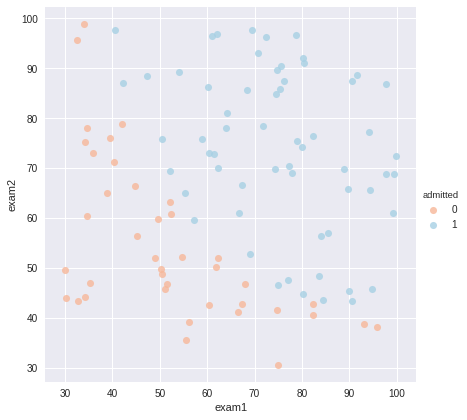

In [4]:
sns.set(context='notebook',style='darkgrid',palette=sns.color_palette('RdBu',2))
sns.lmplot('exam1','exam2',hue='admitted',
           data=data,
           size=6,
           fit_reg=False,#意思是用不用拟合散点的线
           scatter_kws={'s':50}
           )
plt.show()

In [5]:
def get_X(df):   #读取X的数据，和linear regression一样也需要给X多添加一列1
    ones=pd.DataFrame({'ones':np.ones(len(df))})
    data=pd.concat([ones,df],axis=1)
    return np.array(data.iloc[:, :-1])  # 这个操作返回 ndarray,不是矩阵


def get_y(df):  #读取y的数据，即读取整个data的最后一列
    return np.array(df.iloc[:,-1])   #[:,-1]返回最后一列，[:,:-1]返回的是除最后一列之外的所有数据
def normal_feature(df):
    return np.apply(lambda  column:(column-column.mean())/column.std())   #即特征缩放，整成均值为零，方差为1的数据
X=get_X(data)
print(X.shape,type(X))
y=get_y(data)
print(y.shape,type(y))
    

(100, 3) <class 'numpy.ndarray'>
(100,) <class 'numpy.ndarray'>


# Sigmoid 函数

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))



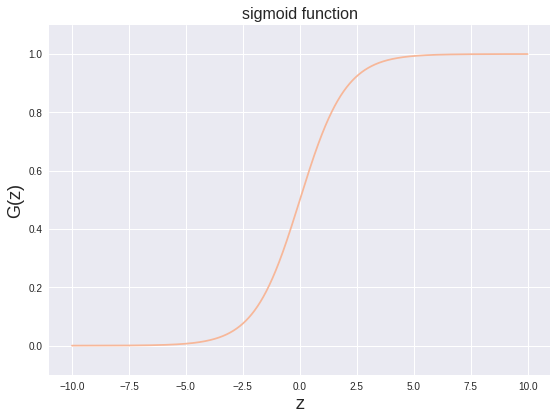

In [7]:
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(np.arange(-10,10,step=0.01),
        sigmoid(np.arange(-10,10,step=0.01)))
ax.set_ylim(-0.1,1.1)
ax.set_xlabel('z',fontsize=18)
ax.set_ylabel('G(z)',fontsize=18)
ax.set_title('sigmoid function',fontsize=16)
plt.show()

# Cost Function  (代价函数)
> * $max(\ell(\theta)) = min(-\ell(\theta))$  
> * choose $-\ell(\theta)$ as the cost function

$$\begin{align}
  & J\left( \theta  \right)=-\frac{1}{m}\sum\limits_{i=1}^{m}{[{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)+\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
 & =\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
\end{align}$$


In [8]:
theta=np.zeros(3)
theta

array([ 0.,  0.,  0.])

In [9]:
def cost(theta,X,y):
    return np.mean(-y*np.log(sigmoid(X@theta))-(1-y)*np.log(1-sigmoid(X@theta)))

In [10]:
cost(theta,X,y)

0.69314718055994529

# Gradient Descent (梯度下降)
* 这是批量梯度下降（batch gradient descent）  
* 转化为向量化计算： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [11]:
def gradient(theta,X,y):
    return (1/len(X))*X.T@(sigmoid(X@theta)-y)

In [12]:
gradient(theta,X,y)

array([ -0.1       , -12.00921659, -11.26284221])

# 参数拟合

In [13]:
import  scipy.optimize as opt

In [14]:
res=opt.minimize(fun=cost,x0=theta,args=(X,y),method='Newton-CG',jac=gradient)

In [15]:
print(res)

     fun: 0.20349770280321056
     jac: array([  1.31110614e-05,   8.53917373e-04,   6.71174423e-04])
 message: 'Optimization terminated successfully.'
    nfev: 73
    nhev: 0
     nit: 29
    njev: 253
  status: 0
 success: True
       x: array([-25.15847675,   0.20620886,   0.20144849])


# 用训练集来进行验证和预测

In [16]:
def predict(x,theta):
    prob=sigmoid(x@theta)
    return (prob>=0.5).astype(int)

In [17]:
final_theta=res.x
y_pred=predict(X,final_theta)

print(classification_report(y,y_pred))


             precision    recall  f1-score   support

          0       0.87      0.85      0.86        40
          1       0.90      0.92      0.91        60

avg / total       0.89      0.89      0.89       100



# 寻找决策边界

In [18]:
print(res.x)

[-25.15847675   0.20620886   0.20144849]


In [19]:
coef=-(res.x/res.x[2])
print(coef)

x=np.arange(130,step=0.1)
y=coef[0]+coef[1]*x

[ 124.88789225   -1.02363073   -1.        ]


In [20]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


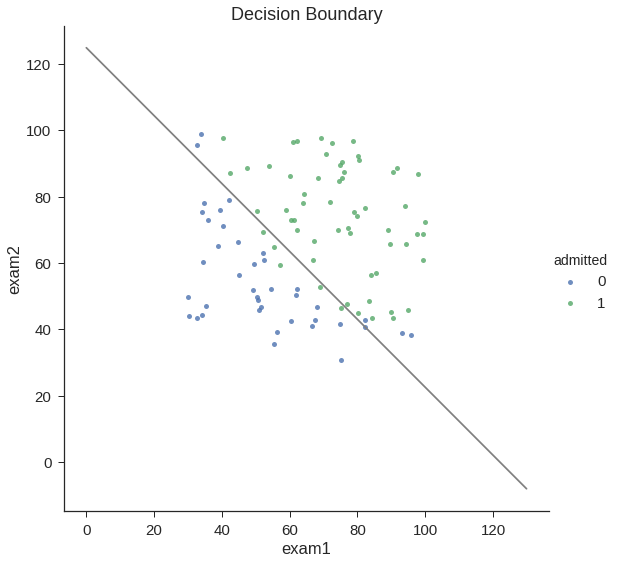

In [21]:
sns.set(context='notebook',style='ticks',font_scale=1.5)
sns.lmplot('exam1','exam2',hue='admitted',data=data,
          size=8,
          fit_reg=False,
          scatter_kws={'s':25})
plt.plot(x,y,'grey')
plt.xlim=(0,130)
plt.ylim=(0,130)
plt.title("Decision Boundary")
plt.show()

# 3 正则化处理（regularization）

In [22]:
df=pd.read_csv('ex2data2.txt',names=['text1','text2','accepted'])
df.head(7)

,text1,text2,accepted
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
5,-0.524770,0.209800,1
6,-0.398040,0.034357,1


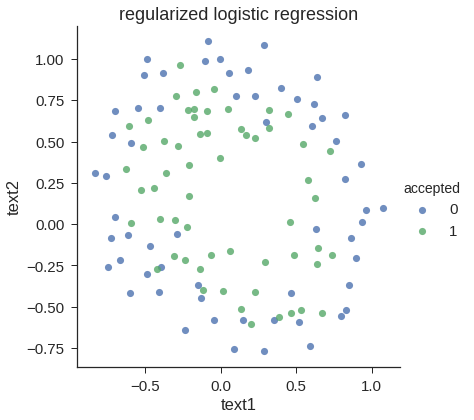

In [23]:
sns.set(context='notebook',style='ticks',font_scale=1.5)
sns.lmplot('text1','text2',hue='accepted',data=df,
          size=6,
          fit_reg=False,
          scatter_kws={'s':51})
plt.title('regularized logistic regression')
plt.show()

# feature mapping (特征映射)
polynomial expansion

```
for i in 0..i
  for p in 0..i:
    output x^(i-p) * y^p
```
<img style="float: left;" src="../img/mapped_feature.png">

In [24]:
def feature_mapping(x, y, power, as_ndarray=False):
#     """return mapped features as ndarray or dataframe"""
    # data = {}
    # # inclusive
    # for i in np.arange(power + 1):
    #     for p in np.arange(i + 1):
    #         data["f{}{}".format(i - p, p)] = np.power(x, i - p) * np.power(y, p)

    data = {"f{}{}".format(i - p, p): np.power(x, i - p) * np.power(y, p)
                for i in np.arange(power + 1)
                for p in np.arange(i + 1)
            }

    if as_ndarray:
        return pd.DataFrame(data).as_matrix()
    else:
        return pd.DataFrame(data)


In [25]:
x1=np.array(df.text1)
x2=np.array(df.text2)
print(x1.shape)
print(x2.shape)

(118,)
(118,)


In [26]:
data=feature_mapping(x1,x2,power=6)
print(data.shape)
data.head()

(118, 28)


,f00,f01,f02,f03,f04,f05,f06,f10,f11,f12,...,f30,f31,f32,f33,f40,f41,f42,f50,f51,f60
0,1.0,0.69956,0.489384,0.342354,0.239497,0.167542,0.117206,0.051267,0.035864,0.025089,...,0.000135,0.000094,0.000066,0.000046,0.000007,0.000005,0.000003,3.541519e-07,2.477505e-07,1.815630e-08
1,1.0,0.68494,0.469143,0.321335,0.220095,0.150752,0.103256,-0.092742,-0.063523,-0.043509,...,-0.000798,-0.000546,-0.000374,-0.000256,0.000074,0.000051,0.000035,-6.860919e-06,-4.699318e-06,6.362953e-07
2,1.0,0.69225,0.479210,0.331733,0.229642,0.158970,0.110047,-0.213710,-0.147941,-0.102412,...,-0.009761,-0.006757,-0.004677,-0.003238,0.002086,0.001444,0.001000,-4.457837e-04,-3.085938e-04,9.526844e-05
3,1.0,0.50219,0.252195,0.126650,0.063602,0.031940,0.016040,-0.375000,-0.188321,-0.094573,...,-0.052734,-0.026483,-0.013299,-0.006679,0.019775,0.009931,0.004987,-7.415771e-03,-3.724126e-03,2.780914e-03
4,1.0,0.46564,0.216821,0.100960,0.047011,0.021890,0.010193,-0.513250,-0.238990,-0.111283,...,-0.135203,-0.062956,-0.029315,-0.013650,0.069393,0.032312,0.015046,-3.561597e-02,-1.658422e-02,1.827990e-02


# regularized cost （正则化代价函数）
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [30]:
theta=np.zeros(data.shape[1])
print(theta.shape)
X=feature_mapping(x1,x2,power=6,as_ndarray=True)
print(X.shape,type(X))

y=get_y(df)
print(y.shape)

(28,)
(118, 28) <class 'numpy.ndarray'>
(118,)


In [33]:
def regularized_cost(theta,X,y,l=1):
    theta_j1_to_n=theta[1:]
    regularized_term=(l/(2*len(X))*np.power(theta_j1_to_n,2).sum())
    
    return cost(theta,X,y)+regularized_term
    

In [34]:
regularized_cost(theta,X,y,l=1)   #因为我们设theta=0，所以加了正则化项和没加一样

0.6931471805599454

# regularized gradient （正则化梯度）
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\left( \frac{1}{m}\sum\limits_{i=1}^{m}{\left( {{h}_{\theta }}\left( {{x}^{\left( i \right)}} \right)-{{y}^{\left( i \right)}} \right)} \right)+\frac{\lambda }{m}{{\theta }_{j}}\text{ }\text{             for  j}\ge \text{1}$$

In [39]:
def regularized_gradient(theta,X,y,l=1):
    theta_j1_to_n=theta[1:]
    regularized_theta=(l/len(X)*theta_j1_to_n)
    
    regularized_term=np.concatenate([np.array([0]),regularized_theta])
    return gradient(theta,X,y)+regularized_term

In [40]:
regularized_gradient(theta,X,y)

array([  8.47457627e-03,   7.77711864e-05,   3.76648474e-02,
         2.34764889e-02,   3.93028171e-02,   3.10079849e-02,
         3.87936363e-02,   1.87880932e-02,   1.15013308e-02,
         8.19244468e-03,   3.09593720e-03,   4.47629067e-03,
         1.37646175e-03,   5.03446395e-02,   7.32393391e-03,
         1.28600503e-02,   5.83822078e-03,   7.26504316e-03,
         1.83559872e-02,   2.23923907e-03,   3.38643902e-03,
         4.08503006e-04,   3.93486234e-02,   4.32983232e-03,
         6.31570797e-03,   1.99707467e-02,   1.09740238e-03,
         3.10312442e-02])

# 拟合参数

In [41]:
import scipy.optimize as opt

In [43]:
print('init cost={}'.format(regularized_cost(theta,X,y)))
res=opt.minimize(fun=regularized_cost,x0=theta,args=(X,y),method='Newton-CG',jac=regularized_gradient)
res

init cost=0.6931471805599454


     fun: 0.5290027297128032
     jac: array([  1.21715281e-07,   8.28608238e-08,   4.33264464e-08,
         7.14607751e-09,  -1.95796824e-08,  -4.80293320e-09,
         1.29548304e-08,  -8.66022925e-09,  -1.11692835e-08,
         2.44548549e-09,   5.97159799e-09,  -3.10175481e-09,
         2.84088139e-09,   3.68493808e-08,   2.44239121e-09,
         1.38623362e-09,   1.30580781e-09,  -2.07975693e-10,
        -2.03184463e-09,  -4.75280011e-09,   3.06506937e-10,
         6.83218269e-10,   2.06530132e-08,   2.83727034e-10,
         3.70483493e-09,   3.98612695e-09,  -2.46467884e-09,
         7.81200474e-09])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 66
  status: 0
 success: True
       x: array([ 1.2727394 ,  1.18109077, -1.43166316, -0.17513213, -1.19281993,
       -0.45635881, -0.92465134,  0.62527173, -0.91742446, -0.35723923,
       -0.27470558, -0.29537848, -0.14388666, -2.01996079, -0.36553541,
       -0.61555568, -0.27778476, -

# 预测 prediction

In [44]:
final_theta=res.x
y_pred=predict(X,final_theta)

print(classification_report(y,y_pred))

             precision    recall  f1-score   support

          0       0.90      0.75      0.82        60
          1       0.78      0.91      0.84        58

avg / total       0.84      0.83      0.83       118



# 测试不同的lambda并画出决策边界
* 我们找到所有满足 $X\times \theta = 0$ 的x
* instead of solving polynomial equation, just create a coridate x,y grid that is dense enough, and find all those $X\times \theta$ that is close enough to 0, then plot them  就是不解方程了，直接把x，y描点画图，只要点描的足够细，也样能看出决策边界是什么样子

In [48]:
def draw_boundary(power, l):
#     """
#     power: polynomial power for mapped feature
#     l: lambda constant
#     """
    density = 1000
    threshhold = 2 * 10**-3

    final_theta = feature_mapped_logistic_regression(power, l)
    x, y = find_decision_boundary(density, power, final_theta, threshhold)

    df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
    sns.lmplot('test1', 'test2', hue='accepted', data=df, size=6, fit_reg=False, scatter_kws={"s": 100})

    plt.scatter(x, y, c='R', s=10)
    plt.title('Decision boundary')
    plt.show()

In [55]:
def feature_mapped_logistic_regression(power,l):
    df=pd.read_csv('ex2data2.txt',names=['test1','test2','accepted'])
    x1=np.array(df.test1)
    x2=np.array(df.test2)
    y=get_y(df)
    X=feature_mapping(x1,x2,power,as_ndarray=True)
    theta=np.zeros(X.shape[1])
    
    res=opt.minimize(fun=regularized_cost,
                     x0=theta,
                     args=(X,y,l),
                     method='TNC',
                     jac=regularized_gradient
    )
    final_theta=res.x
    return final_theta
    
    

In [56]:
def find_decision_boundary(density, power, theta, threshhold):
    t1 = np.linspace(-1, 1.5, density)
    t2 = np.linspace(-1, 1.5, density)

    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    mapped_cord = feature_mapping(x_cord, y_cord, power)  # this is a dataframe

    inner_product = mapped_cord.as_matrix() @ theta

    decision = mapped_cord[np.abs(inner_product) < threshhold]

    return decision.f10, decision.f01
    
    
    

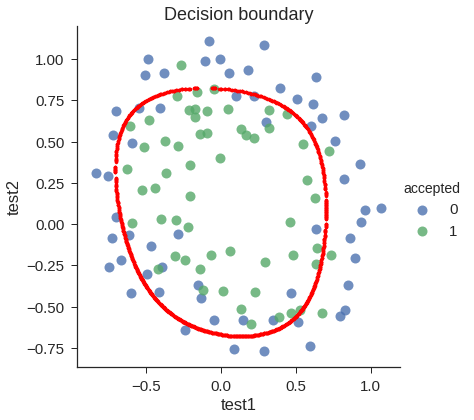

In [57]:
draw_boundary(power=6,l=4)